# Hands-on Activity 9.1 Data Visualization using Pandas and Matplotlib.
##Instructions:

* Create a Python notebook to answer all shown procedures, exercises and analysis in this section.

##Resources:

* Download the following datasets: earthquakes-1.csv Download earthquakes-1.csv, fb_stock_prices_2018.csv

##Procedures:

* 9.1 Introduction to Matplotlib
* 9.2 Plotting with Pandas
* 9.3 Pandas Plotting Subpackage

##Data Analysis:
Each plotting methods have their own configuring principles because of their difference in usage. The procedure provided careful and comprehensive instructions which could be tinkered with for further understanding. This module helps us visualize further our datasets in different methods.
##Supplementary Activity:

Using the CSV files provided and what we have learned so far in this module complete the following exercises

1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.

## Setup

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date',parse_dates=True)

In [ ]:
fb

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726
...,...,...,...,...,...
2018-12-24,123.10,129.74,123.0200,124.06,22066002
2018-12-26,126.00,134.24,125.8900,134.18,39723370
2018-12-27,132.44,134.99,129.6700,134.52,31202509


<Axes: title={'center': 'Rolling 20-Day Minimum of Facebook Closing Price'}, xlabel='Date', ylabel='Closing Price'>

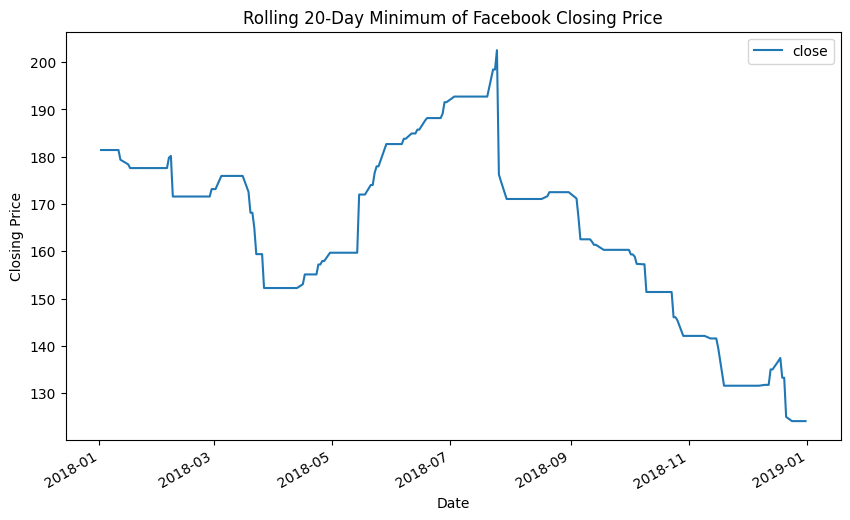

In [ ]:
rolling_min = fb.rolling('20D').agg({'close': 'min'}) # rolling 20 day while aggregating the minimum of closing price

# plot
rolling_min.plot(figsize=(10, 6), xlabel='Date', ylabel='Closing Price', title='Rolling 20-Day Minimum of Facebook Closing Price')

2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.

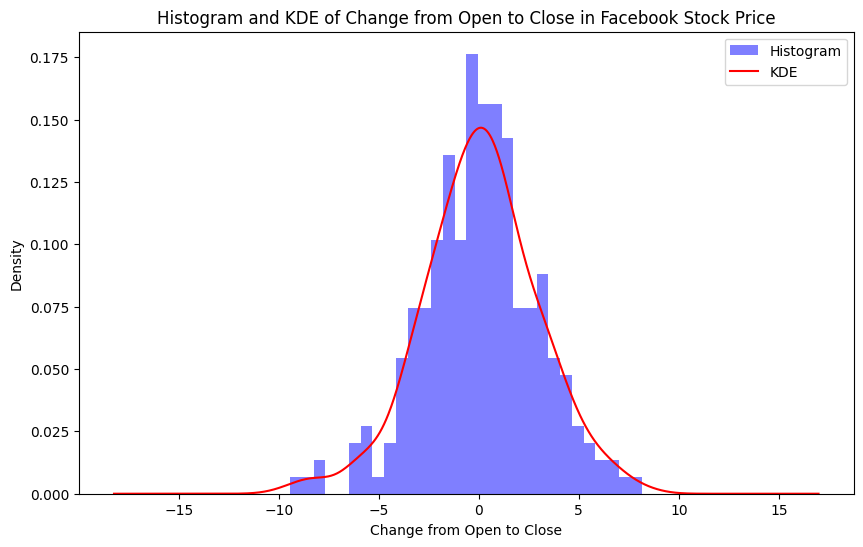

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# open to close
fb['open_to_close'] = fb['close'] - fb['open']  # subtract open from close

# histogram
plt.figure(figsize=(10, 6))
fb['open_to_close'].hist(bins=30, alpha=0.5, color='blue', density=True, label='Histogram')

# kde
fb['open_to_close'].plot(kind='kde', color='red', label='KDE')

# labeling and title
plt.xlabel('Change from Open to Close')
plt.ylabel('Density')
plt.title('Histogram and KDE of Change from Open to Close in Facebook Stock Price')
plt.legend()



3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

## Setup

In [ ]:
earthquakes = pd.read_csv('earthquakes.csv')
indonesia_earthquakes = earthquakes.query('parsed_place == "Indonesia"') # query the df to only select indonesia

Text(0, 0.5, 'Magnitude')

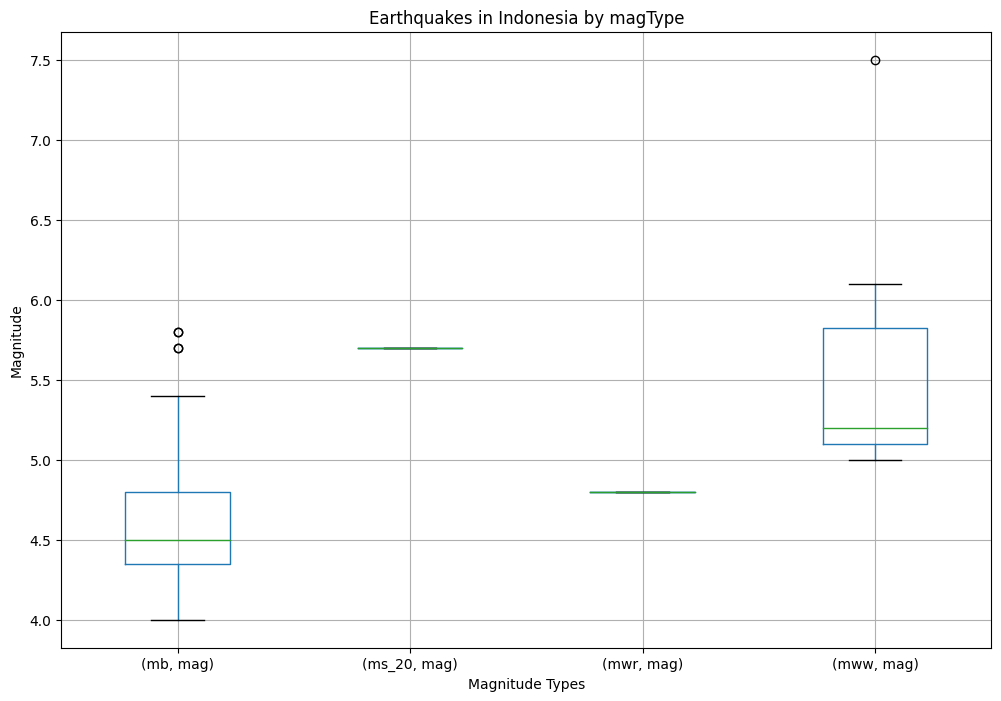

In [ ]:
indonesia_earthquakes[['mag']].groupby(indonesia_earthquakes['magType']).boxplot( # get the magnitude then group by magnitude type
    figsize=(12,8), subplots=False # no subplots
)
# labeling and title
plt.title('Earthquakes in Indonesia by magType')
plt.xlabel('Magnitude Types')
plt.ylabel('Magnitude')

4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single
line

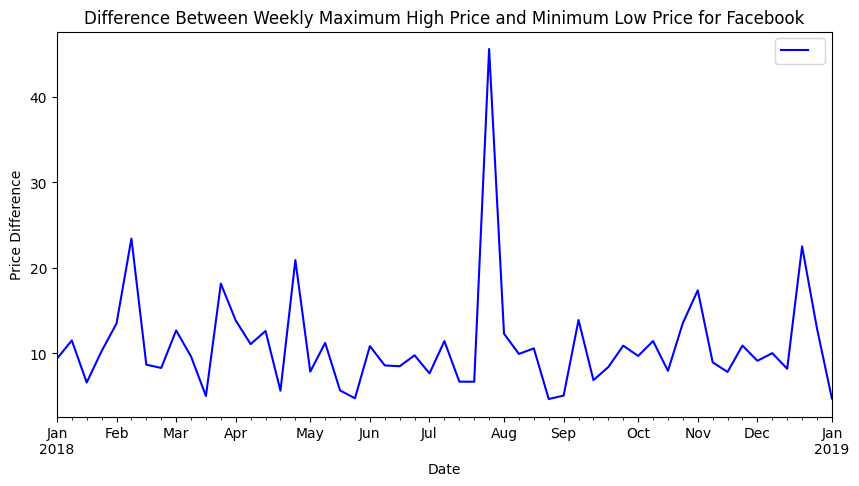

In [ ]:
# use resample('W) for weekly then apply lambda to all the data by subtracting maximum high price and minimum low price
weekly_price_difference = fb.resample('W').apply(lambda x: x['high'].max() - x['low'].min())
# plotting the line graph
weekly_price_difference.plot(
    kind='line',
    figsize=(10, 5),
    style='b-',
    legend=True,
    title='Difference Between Weekly Maximum High Price and Minimum Low Price for Facebook'
)
# labelling and title
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.show()


5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:

* The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).

* The second subplot will be a bar plot showing the net effect this had monthly, using resample().

* Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).

* Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.

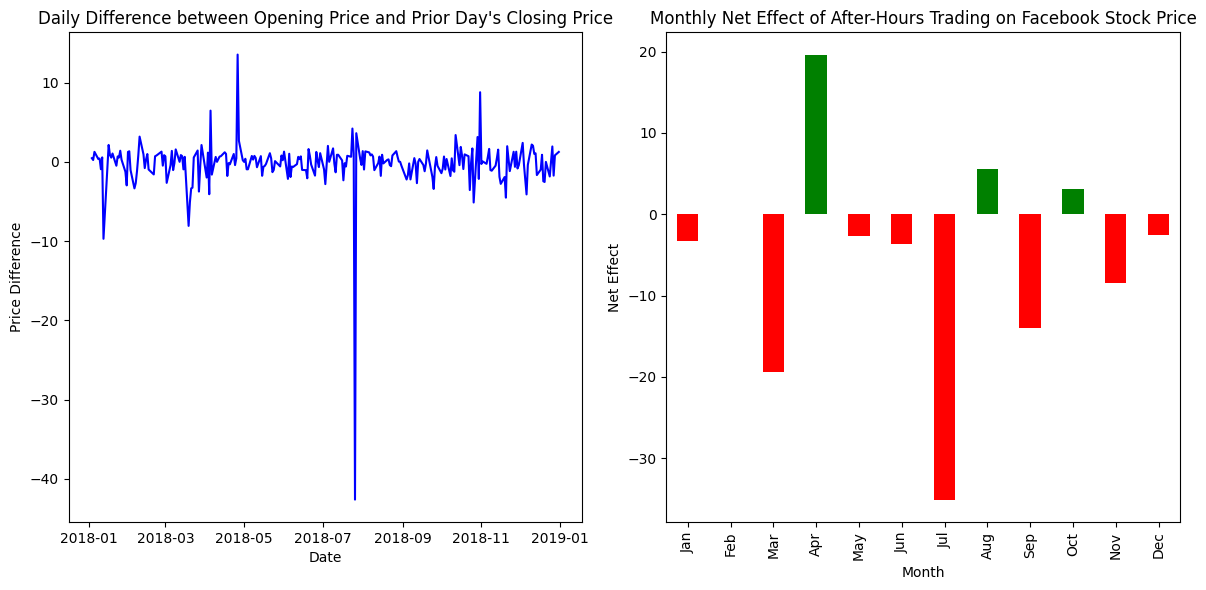

In [ ]:
# calculate daily drifference
daily_price_difference = fb['open'] - fb['close'].shift(1)

# subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# plot subplot 1
axes[0].plot(daily_price_difference, color='blue')
axes[0].set_title('Daily Difference between Opening Price and Prior Day\'s Closing Price')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price Difference')

# monthly net effect, resample(M) for mnoth then use .sum() for net
monthly_net_effect = daily_price_difference.resample('M').sum()

# plot subplot 2
colors = ['green' if val >= 0 else 'red' for val in monthly_net_effect]
monthly_net_effect.plot(kind='bar', ax=axes[1], color=colors)
axes[1].set_title('Monthly Net Effect of After-Hours Trading on Facebook Stock Price')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Net Effect')
axes[1].set_xticklabels(monthly_net_effect.index.strftime('%b'))

plt.tight_layout()

## Summary/Conclusion:
This section of the module focused on visualizing data using Pandas and Matplotlib. There are several plotting methods to choose from and each of them have their own forte in visualizing. An example is a line graph that specializes in correlation and linear regression. Another example is box plots offer to show the quartiles, median, IQR, and the outliers. These methods have their own role in showcasing data. Fortunately, we can utilize these methods convenientlyusing the combination of Pandas and Matplotlib.

